In [1]:
import sys
import struct
import ctypes
import numpy as np

from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import ctypes
import time

%matplotlib notebook

class pointStruct(ctypes.Structure):
    _fields_ = [('lineCount', ctypes.c_int),
                ('allDataPointsCount', ctypes.c_int),
                ('pointCounts', ctypes.POINTER(ctypes.c_int)),
                ('xValues', ctypes.POINTER(ctypes.c_double)),
                ('yValues', ctypes.POINTER(ctypes.c_double)),
                ('zValues', ctypes.POINTER(ctypes.c_double))]
  
mydll = ctypes.cdll.LoadLibrary(r"D:\github\RelativicHeavyBall\x64\Debug\testPythonDLL.dll")

testFunc = mydll.logisticRegressionMulty
mydll.logisticRegressionMulty.restype = ctypes.POINTER(pointStruct)
mydll.logisticRegressionMulty.argtypes = [ctypes.c_double, ctypes.c_double, ctypes.c_double, ctypes.c_double, 
                                          ctypes.c_int, ctypes.c_double, ctypes.c_double, ctypes.c_double, 
                                          ctypes.c_bool,
                                          ctypes.c_bool,
                                          ctypes.c_double] 

print(time.strftime('%X %x %Z'))

_xStart = 0
_yStart = 0
_xSpeedStart = 0
_ySpeedStart = 0

_stepLimit = 2000
_targetAccuracy = 0.0001
_param = 1.0
_lightSpeed = 8.0
_useGradientHessian = True
_useHavyBallHessian = False
_h = 0.01

ret = testFunc(_xStart, _yStart, _xSpeedStart, _ySpeedStart, 
               _stepLimit, _targetAccuracy, _param, _lightSpeed, 
               _useGradientHessian, _useHavyBallHessian,
               _h)

print(time.strftime('%X %x %Z'))

array_pointer = ctypes.cast(ret.contents.pointCounts, ctypes.POINTER(ctypes.c_int * ret.contents.lineCount))
pointCounts = np.frombuffer(array_pointer.contents, dtype = ctypes.c_int)

array_pointer = ctypes.cast(ret.contents.xValues, ctypes.POINTER(ctypes.c_double * ret.contents.allDataPointsCount))
xValues = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)

array_pointer = ctypes.cast(ret.contents.yValues, ctypes.POINTER(ctypes.c_double * ret.contents.allDataPointsCount))
yValues = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)

array_pointer = ctypes.cast(ret.contents.zValues, ctypes.POINTER(ctypes.c_double * ret.contents.allDataPointsCount))
zValues = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)

print(ret.contents.lineCount)
print(ret.contents.allDataPointsCount)
print(pointCounts)
print(xValues)
print(yValues)
print(zValues)

class logisticRegressionData(ctypes.Structure):
    _fields_ = [('negativePointCount', ctypes.c_int),
                ('negativePointXValues', ctypes.POINTER(ctypes.c_double)),
                ('negativePointYValues', ctypes.POINTER(ctypes.c_double)),
                
                ('positivePointCount', ctypes.c_int),
                ('positivePointXValues', ctypes.POINTER(ctypes.c_double)),
                ('positivePointYValues', ctypes.POINTER(ctypes.c_double)),
                
                ('lineCount', ctypes.c_int),
                ('lineAParameters', ctypes.POINTER(ctypes.c_double)),
                ('lineBParameters', ctypes.POINTER(ctypes.c_double)),
                ('lineCParameters', ctypes.POINTER(ctypes.c_double))]
    
getLogisticRegressionData = mydll.getLogisticRegressionData
mydll.getLogisticRegressionData.restype = ctypes.POINTER(logisticRegressionData)
mydll.getLogisticRegressionData.argtypes = []

data = getLogisticRegressionData()

array_pointer = ctypes.cast(data.contents.negativePointXValues, ctypes.POINTER(ctypes.c_double * data.contents.negativePointCount))
negativePointXValues = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)
array_pointer = ctypes.cast(data.contents.negativePointYValues, ctypes.POINTER(ctypes.c_double * data.contents.negativePointCount))
negativePointYValues = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)

array_pointer = ctypes.cast(data.contents.positivePointXValues, ctypes.POINTER(ctypes.c_double * data.contents.positivePointCount))
positivePointXValues = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)
array_pointer = ctypes.cast(data.contents.positivePointYValues, ctypes.POINTER(ctypes.c_double * data.contents.positivePointCount))
positivePointYValues = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)

array_pointer = ctypes.cast(data.contents.lineAParameters, ctypes.POINTER(ctypes.c_double * data.contents.lineCount))
lineAParameters = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)
array_pointer = ctypes.cast(data.contents.lineBParameters, ctypes.POINTER(ctypes.c_double * data.contents.lineCount))
lineBParameters = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)
array_pointer = ctypes.cast(data.contents.lineCParameters, ctypes.POINTER(ctypes.c_double * data.contents.lineCount))
lineCParameters = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)

#print(negativePointXValues)
#print(negativePointYValues)
#print(positivePointXValues)
#print(positivePointYValues)
#print(lineAParameters)
#print(lineBParameters)
#print(lineCParameters)

20:41:01 06/17/20 FLE Daylight Time
20:41:28 06/17/20 FLE Daylight Time
4
8012
[2003 2003 2003 2003]
[ 0.00000000e+00  1.18785885e-04  2.37325352e-04 ... -8.31081176e+00
 -8.31236022e+00 -8.31390774e+00]
[ 0.00000000e+00 -5.76597693e-04 -1.15126668e-03 ...  2.66992233e+00
  2.67030704e+00  2.67069156e+00]
[11.78350207 11.74588868 11.7087072  ...  2.66631139  2.66604541
  2.66577975]


<IPython.core.display.Javascript object>


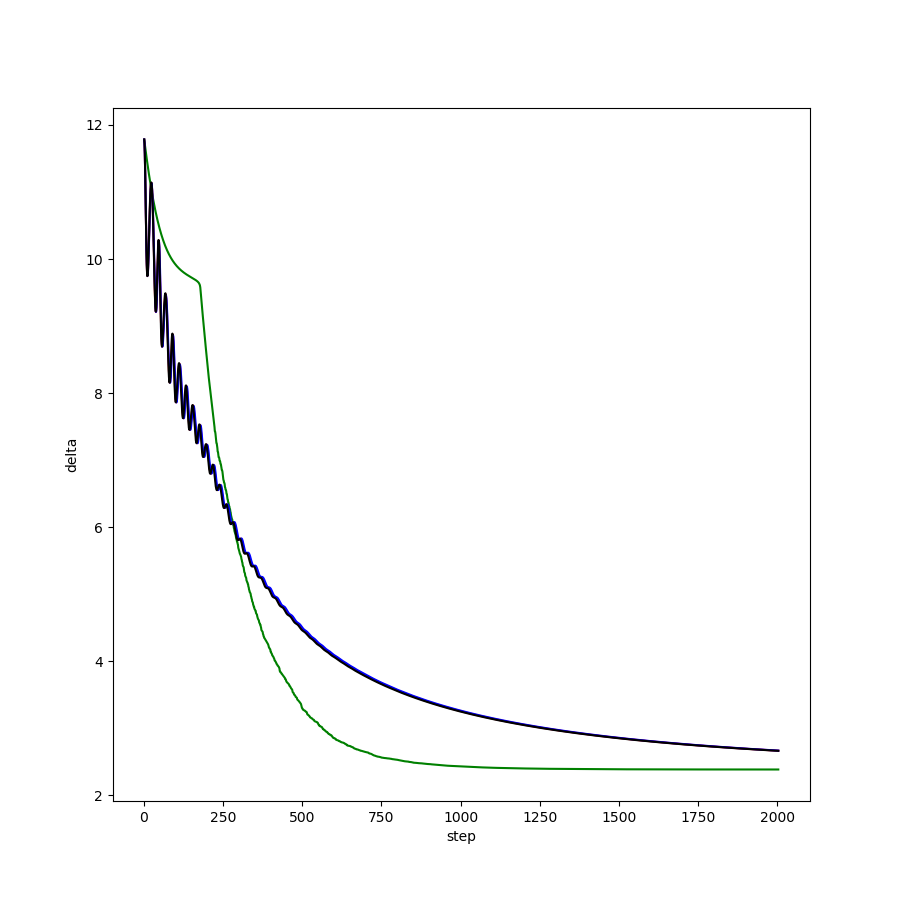

In [4]:
colors = ['g', 'r', 'b', 'k']

fig = plt.figure(figsize = (9, 9)) 

count = pointCounts[0]
iterations = [i+1 for i in range(count)]

a = 0

for x in range(4):     
    sh = 0
    sz = count - sh
    #if x != 0:
    plt.plot(iterations[sh:sh + sz], zValues[a + sh:a+sh + sz], color = colors[x])
    a += pointCounts[x]

plt.ylabel('delta')
plt.xlabel('step')
plt.show()

<IPython.core.display.Javascript object>


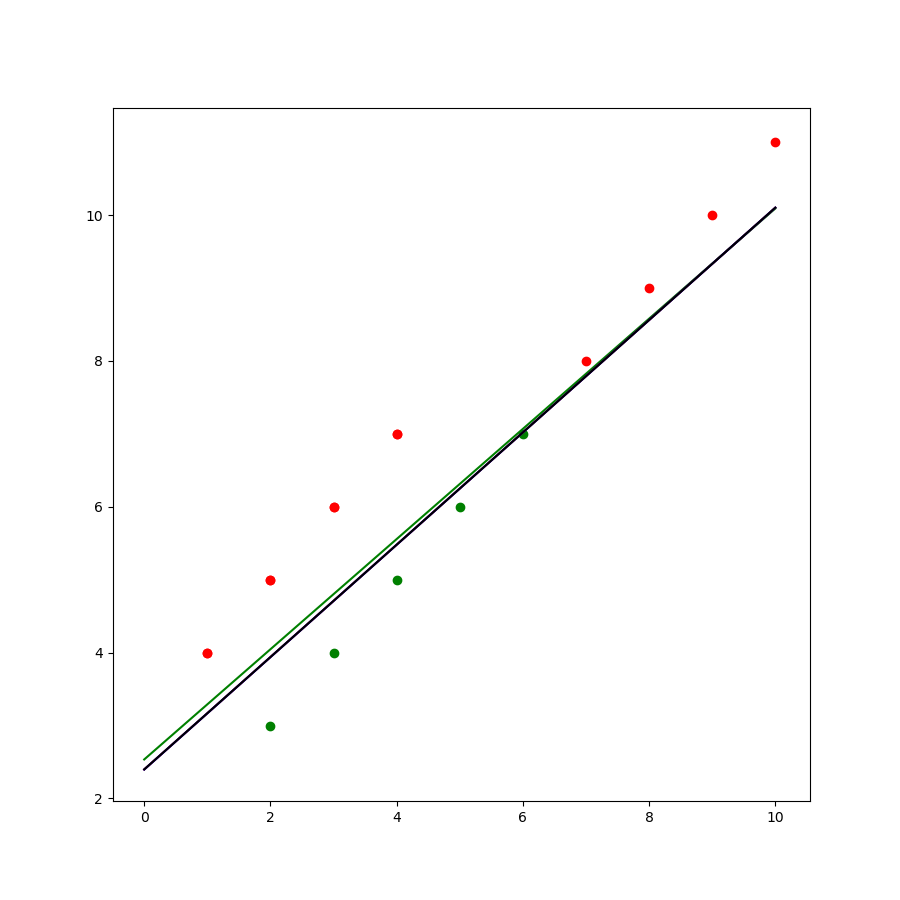

[2.534811067575998, 2.6890106222817174, 2.8432101769874363, 2.9974097316931556, 3.151609286398875, 3.305808841104594, 3.4600083958103127, 3.6142079505160325, 3.768407505221752, 3.9226070599274707, 4.07680661463319, 4.231006169338909, 4.385205724044628, 4.539405278750348, 4.6936048334560665, 4.847804388161785, 5.002003942867505, 5.156203497573224, 5.310403052278944, 5.464602606984663, 5.618802161690382, 5.7730017163961005, 5.92720127110182, 6.081400825807539, 6.235600380513258, 6.389799935218978, 6.543999489924697, 6.698199044630416, 6.8523985993361345, 7.006598154041855, 7.160797708747573, 7.314997263453293, 7.469196818159013, 7.623396372864732, 7.77759592757045, 7.931795482276169, 8.08599503698189, 8.240194591687608, 8.394394146393328, 8.548593701099046, 8.702793255804766, 8.856992810510484, 9.011192365216202, 9.165391919921923, 9.319591474627643, 9.473791029333363, 9.62799058403908, 9.7821901387448, 9.936389693450518, 10.090589248156236]


In [3]:
fig = plt.figure(figsize = (9, 9)) 

n=50

x = np.linspace(0, 10, n)

def f1(i):
    return (-lineAParameters[0]*x[i]+lineCParameters[0])/lineBParameters[0]
def f2(i):
    return (-lineAParameters[1]*x[i]+lineCParameters[1])/lineBParameters[1]
def f3(i):
    return (-lineAParameters[2]*x[i]+lineCParameters[2])/lineBParameters[2]
def f4(i):
    return (-lineAParameters[3]*x[i]+lineCParameters[3])/lineBParameters[3]


y1 = [f1(i) for i in range(n)]
y2 = [f2(i) for i in range(n)]
y3 = [f3(i) for i in range(n)]
y4 = [f4(i) for i in range(n)]

print(y1)

plt.plot(x, y1, color='g')
plt.plot(x, y2, color='r')
plt.plot(x, y3, color='b')
plt.plot(x, y4, color='k')

for j in range(data.contents.negativePointCount):
    plt.scatter(negativePointXValues[j], negativePointYValues[j], color = 'r')
    
for j in range(data.contents.positivePointCount):
    plt.scatter(positivePointXValues[j], positivePointYValues[j], color = 'g')